In [1]:
from matplotlib.pyplot import subplots, legend
from scipy.signal import lfilter, firwin, freqz
from scipy.fft import fft
from urllib.request import urlopen
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import numpy as np
import io

In [2]:
data, samplerate = sf.read('../assets/record.wav')
Audio(data[:,0], rate=samplerate)

In [3]:
taps = firwin(59, cutoff = 2000,fs=samplerate, window = "hamming", pass_zero = "highpass") # Filtro passa Baixa (fc = 0.01fs) e pass_zero pode ser: bandpass, lowpass, highpass, bandstop
filtered_data = lfilter(taps, 1.0, data[:,0])
Audio(filtered_data, rate=samplerate)

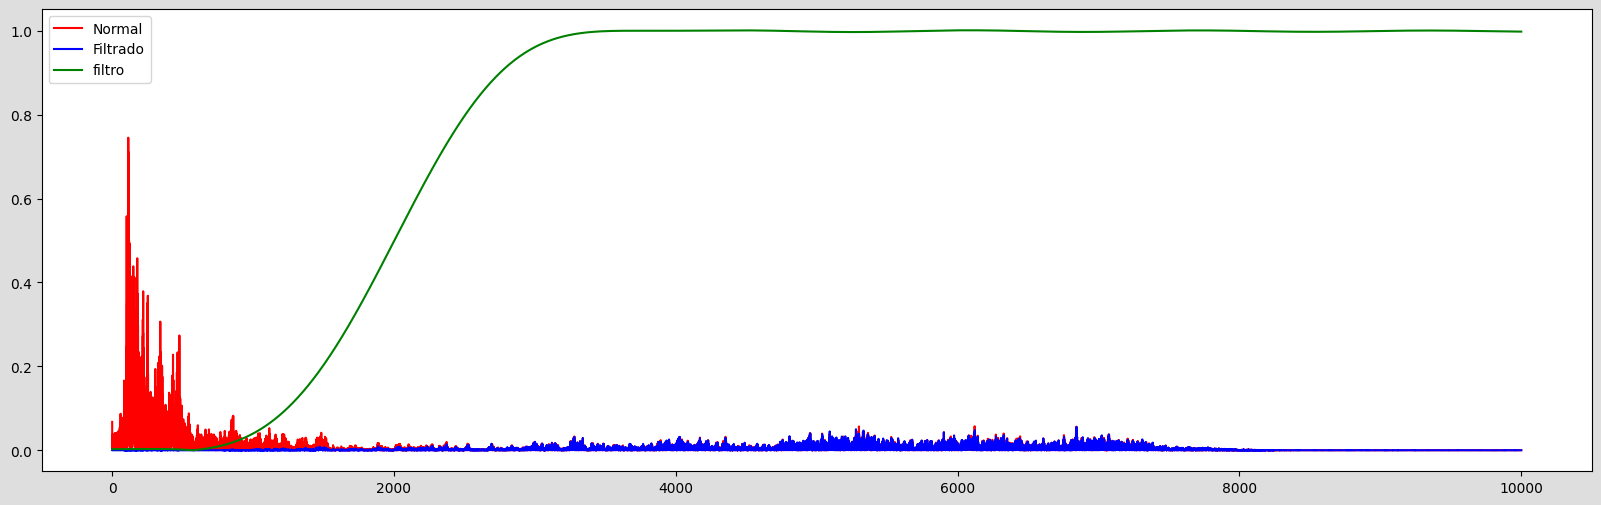

In [13]:
fig, ax = subplots(figsize=(20,6), facecolor='#DEDEDE')

fmax = 10000#samplerate//2 # // -> Divisão inteira, trunca para o menor inteiro mais proximo.
tsamples = (np.size(data[:,0],axis=0)*fmax)//samplerate
x = np.linspace(0, fmax, tsamples)
y = fft(data[:,0])[:tsamples]
yf = fft(filtered_data[0:])[:tsamples]

w, h = freqz(taps, worN=x, fs = samplerate)
ymax = max([max(abs(y)), max(abs(yf))])
line1, line2, line3 = ax.plot(np.real(x), abs(np.real(y/ymax)),"r",np.real(x), abs(np.real(yf/ymax)),"b",np.real(x), abs(h), 'g')
legend([line1,line2, line3],["Normal","Filtrado", "filtro"])